In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [2]:
df = pd.read_csv("Retail Customer Data 2009-10.csv", encoding = 'unicode_escape')
df

,Invoice No,Stock Code,Product Description,Quantity,Invoice Date,Unit Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,12/9/2010 20:01,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,12/9/2010 20:01,3.75,17530.0,United Kingdom


In [3]:
df.dtypes

Invoice No              object
Stock Code              object
Product Description     object
Quantity                 int64
Invoice Date            object
Unit Price             float64
Customer ID            float64
Country                 object
dtype: object

In [4]:
df.tail(5)

,Invoice No,Stock Code,Product Description,Quantity,Invoice Date,Unit Price,Customer ID,Country
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,12/9/2010 20:01,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,12/9/2010 20:01,3.75,17530.0,United Kingdom
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,12/9/2010 20:01,1.95,17530.0,United Kingdom


In [5]:
CurrentDate = pd.to_datetime("2011-01-01")
CurrentDate

Timestamp('2011-01-01 00:00:00')

In [6]:
df['Invoice Date']=pd.to_datetime(df["Invoice Date"])
df.dtypes

Invoice No                     object
Stock Code                     object
Product Description            object
Quantity                        int64
Invoice Date           datetime64[ns]
Unit Price                    float64
Customer ID                   float64
Country                        object
dtype: object

In [7]:
df.shape

(525461, 8)

In [8]:
df.isnull().sum()

Invoice No                  0
Stock Code                  0
Product Description      2928
Quantity                    0
Invoice Date                0
Unit Price                  0
Customer ID            107927
Country                     0
dtype: int64

In [9]:
df = df.dropna(subset=['Customer ID'])
df.shape

(417534, 8)

In [10]:
Lastrnxdate = df.groupby(["Customer ID"]).max()[['Invoice Date']]
Lastrnxdate

,Invoice Date
Customer ID,
12346.0,2010-10-04 16:33:00
12347.0,2010-12-07 14:57:00
12348.0,2010-09-27 14:59:00
12349.0,2010-10-28 08:23:00
12351.0,2010-11-29 15:23:00
...,...
18283.0,2010-11-22 15:30:00
18284.0,2010-10-06 12:31:00
18285.0,2010-02-17 10:24:00


In [11]:
(CurrentDate - Lastrnxdate['Invoice Date']).dt.days

Customer ID
12346.0     88
12347.0     24
12348.0     95
12349.0     64
12351.0     32
          ... 
18283.0     39
18284.0     86
18285.0    317
18286.0    133
18287.0     39
Name: Invoice Date, Length: 4383, dtype: int64

In [12]:
Lastrnxdate['Invoice Age'] = (CurrentDate - Lastrnxdate['Invoice Date']).dt.days
Lastrnxdate

,Invoice Date,Invoice Age
Customer ID,,
12346.0,2010-10-04 16:33:00,88
12347.0,2010-12-07 14:57:00,24
12348.0,2010-09-27 14:59:00,95
12349.0,2010-10-28 08:23:00,64
12351.0,2010-11-29 15:23:00,32
...,...,...
18283.0,2010-11-22 15:30:00,39
18284.0,2010-10-06 12:31:00,86
18285.0,2010-02-17 10:24:00,317


In [13]:
#recenccy

Recency = Lastrnxdate.drop('Invoice Date', axis=1)
Recency

,Invoice Age
Customer ID,
12346.0,88
12347.0,24
12348.0,95
12349.0,64
12351.0,32
...,...
18283.0,39
18284.0,86
18285.0,317


In [14]:
df

,Invoice No,Stock Code,Product Description,Quantity,Invoice Date,Unit Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [15]:
UniqueInvoice = df.drop_duplicates(subset="Invoice No")
UniqueInvoice

,Invoice No,Stock Code,Product Description,Quantity,Invoice Date,Unit Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.0,United Kingdom
31,489437,22143,CHRISTMAS CRAFT HEART DECORATIONS,6,2009-12-01 09:08:00,2.10,15362.0,United Kingdom
54,489438,21329,DINOSAURS WRITING SET,28,2009-12-01 09:24:00,0.98,18102.0,United Kingdom
...,...,...,...,...,...,...,...,...
525303,538167,22086,PAPER CHAIN KIT 50'S CHRISTMAS,40,2010-12-09 18:58:00,2.55,14713.0,United Kingdom
525328,538168,22078,RIBBON REEL LACE DESIGN,5,2010-12-09 19:23:00,2.10,14702.0,United Kingdom
525358,538169,22156,HEART DECORATION WITH PEARLS,2,2010-12-09 19:28:00,0.85,13230.0,United Kingdom
525371,538170,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2010-12-09 19:32:00,1.69,13969.0,United Kingdom


In [16]:
Frequency = UniqueInvoice.groupby(["Customer ID"]).count()[["Invoice No"]]
Frequency

,Invoice No
Customer ID,
12346.0,15
12347.0,2
12348.0,1
12349.0,4
12351.0,1
...,...
18283.0,6
18284.0,2
18285.0,1


In [17]:
#monetary
df = df.copy()
df.loc[:, "Total"] = df["Quantity"] * df["Unit Price"]
df

,Invoice No,Stock Code,Product Description,Quantity,Invoice Date,Unit Price,Customer ID,Country,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50


In [18]:
Monetary = df.groupby(["Customer ID"])[["Total"]].sum()
Monetary

,Total
Customer ID,
12346.0,-64.68
12347.0,1323.32
12348.0,222.16
12349.0,2646.99
12351.0,300.93
...,...
18283.0,641.77
18284.0,436.68
18285.0,427.00


In [19]:
df[df['Customer ID']==12346.0]

,Invoice No,Stock Code,Product Description,Quantity,Invoice Date,Unit Price,Customer ID,Country,Total
27994,491725,TEST001,This is a test product.,10,2009-12-14 08:34:00,4.50,12346.0,United Kingdom,45.00
28251,491742,TEST001,This is a test product.,5,2009-12-14 11:00:00,4.50,12346.0,United Kingdom,22.50
28254,491744,TEST001,This is a test product.,5,2009-12-14 11:02:00,4.50,12346.0,United Kingdom,22.50
39398,492718,TEST001,This is a test product.,5,2009-12-18 10:47:00,4.50,12346.0,United Kingdom,22.50
39411,492722,TEST002,This is a test product.,1,2009-12-18 10:55:00,1.00,12346.0,United Kingdom,1.00
45228,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.0,United Kingdom,22.50
45230,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.0,United Kingdom,22.50
56117,494450,TEST001,This is a test product.,5,2010-01-14 13:50:00,4.50,12346.0,United Kingdom,22.50
66084,495295,TEST001,This is a test product.,5,2010-01-22 13:30:00,4.50,12346.0,United Kingdom,22.50
71080,C495800,ADJUST,Adjustment by john on 26/01/2010 17,-1,2010-01-26 17:27:00,103.50,12346.0,United Kingdom,-103.50


In [20]:
RFM=pd.concat([Recency,Frequency,Monetary], axis=1)
RFM

,Invoice Age,Invoice No,Total
Customer ID,,,
12346.0,88,15,-64.68
12347.0,24,2,1323.32
12348.0,95,1,222.16
12349.0,64,4,2646.99
12351.0,32,1,300.93
...,...,...,...
18283.0,39,6,641.77
18284.0,86,2,436.68
18285.0,317,1,427.00


In [21]:
RFM.columns = ['Recency', 'Frequency', 'Monetary']
RFM

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,88,15,-64.68
12347.0,24,2,1323.32
12348.0,95,1,222.16
12349.0,64,4,2646.99
12351.0,32,1,300.93
...,...,...,...
18283.0,39,6,641.77
18284.0,86,2,436.68
18285.0,317,1,427.00


In [22]:
# from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled=scaler.fit_transform(RFM)
scaled

array([[-0.24851672,  0.95697059, -0.23118892],
       [-0.90047482, -0.33646175, -0.06824748],
       [-0.17720881, -0.43595655, -0.19751592],
       ...,
       [ 2.08427083, -0.43595655, -0.17346915],
       [ 0.20989131, -0.23696696, -0.08408261],
       [-0.74767214, -0.03797737,  0.05117522]])

In [23]:
scaled.shape

(4383, 3)

### To find out the value of K

In [24]:
#from sklearn.cluster import KMeans
k_range = range(2,11)
sse = []    #Sum of Squared Errors
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42) 
    km.fit(scaled)
    sse.append(km.inertia_)
sse

[9465.021826627824,
 5357.448468957769,
 3984.814910052776,
 2953.224508415391,
 2368.192996779331,
 1946.2857867417806,
 1573.1895901359364,
 1388.5225037281896,
 1294.168750491662]

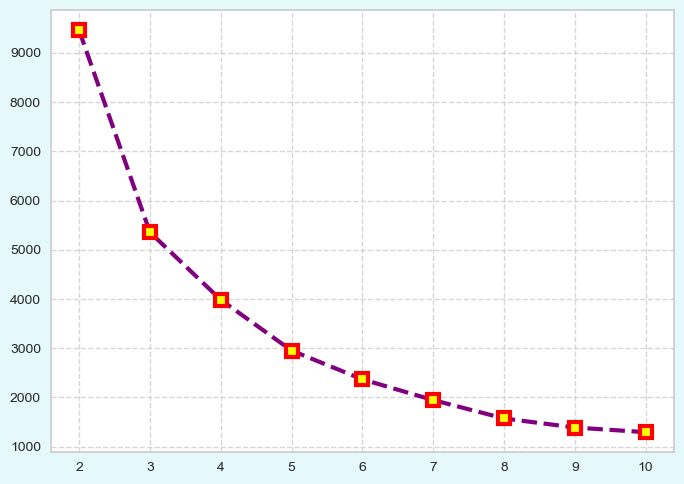

In [25]:
# import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(7,5), facecolor="#E6F9FA")
axes.plot(k_range, sse, color="purple", lw=3, ls='--', marker='s', markersize=8, markerfacecolor="yellow", 
          markeredgewidth=3, markeredgecolor="red")
plt.grid(True, linestyle='--', alpha=0.8)

plt.tight_layout()
plt.show();

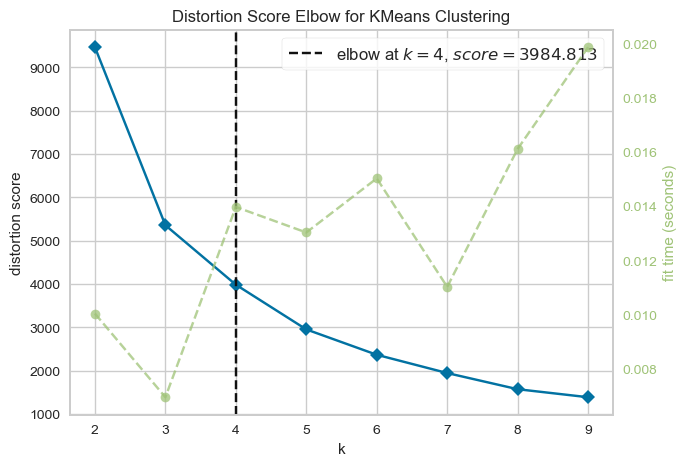

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
# from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)
elbow = KElbowVisualizer(
    model,
    k=(2, 10),
    metric='distortion',
    timings=True,            # Shows training time per k
    locate_elbow=True,       # Marks the "elbow"
    size=(700, 500)          # Resize the plot
)

elbow.fit(scaled)
elbow.show()

### Object Creation and data fitting

In [27]:
#from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled)

KMeans(n_clusters=4, random_state=42)

In [28]:
kmeans.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [29]:
kmeans.labels_.shape

(4383,)

In [30]:
RFM["Clusters"]=(kmeans.labels_)
RFM

,Recency,Frequency,Monetary,Clusters
Customer ID,,,,
12346.0,88,15,-64.68,0
12347.0,24,2,1323.32,0
12348.0,95,1,222.16,0
12349.0,64,4,2646.99,0
12351.0,32,1,300.93,0
...,...,...,...,...
18283.0,39,6,641.77,0
18284.0,86,2,436.68,0
18285.0,317,1,427.00,1


In [31]:
RFM.Clusters.unique()

array([0, 1, 3, 2])

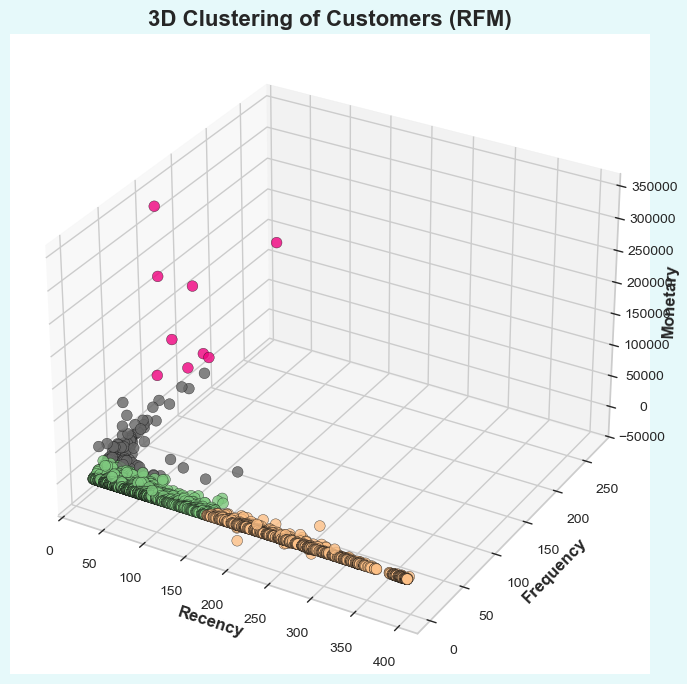

In [32]:
#import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 7), facecolor="#E6F9FA")
ax = fig.add_subplot(111, projection='3d', label="bla")

scatter = ax.scatter(
    RFM["Recency"], 
    RFM["Frequency"], 
    RFM["Monetary"], 
    c=RFM["Clusters"], 
    cmap="Accent", 
    s=60, 
    edgecolor='k', 
    alpha=0.8
)

ax.set_title("3D Clustering of Customers (RFM)", fontsize=16, fontweight='bold')
ax.set_xlabel("Recency", fontsize=12, fontweight='bold')
ax.set_ylabel("Frequency", fontsize=12, fontweight='bold')
ax.set_zlabel("Monetary", fontsize=12, fontweight='bold')
ax.grid(True)

plt.tight_layout()
plt.show()


In [33]:
RFM[RFM.Clusters==0]

,Recency,Frequency,Monetary,Clusters
Customer ID,,,,
12346.0,88,15,-64.68,0
12347.0,24,2,1323.32,0
12348.0,95,1,222.16,0
12349.0,64,4,2646.99,0
12351.0,32,1,300.93,0
...,...,...,...,...
18280.0,37,2,291.85,0
18283.0,39,6,641.77,0
18284.0,86,2,436.68,0


In [34]:
RFM[RFM.Clusters==1]

,Recency,Frequency,Monetary,Clusters
Customer ID,,,,
12355.0,224,1,488.21,1
12362.0,395,1,130.00,1
12366.0,290,1,500.24,1
12368.0,285,1,917.70,1
12370.0,281,3,774.62,1
...,...,...,...,...
18273.0,247,1,153.00,1
18275.0,235,2,741.85,1
18279.0,176,1,231.34,1


In [35]:
RFM[RFM.Clusters==2]

,Recency,Frequency,Monetary,Clusters
Customer ID,,,,
13089.0,25,132,55828.31,2
13694.0,30,105,128172.42,2
14156.0,28,138,183180.55,2
14646.0,31,87,243853.05,2
14911.0,22,270,137675.91,2
15061.0,24,90,82162.74,2
15311.0,22,158,54093.73,2
17850.0,29,158,50414.50,2
18102.0,22,95,341776.73,2


In [36]:
RFM[RFM.Clusters==3]

,Recency,Frequency,Monetary,Clusters
Customer ID,,,,
12437.0,50,28,7498.19,3
12471.0,29,81,19207.69,3
12472.0,26,26,10727.21,3
12474.0,25,25,4849.98,3
12482.0,106,32,21893.53,3
...,...,...,...,...
18172.0,37,38,9811.66,3
18223.0,42,25,7182.35,3
18226.0,35,24,6556.48,3


In [37]:
final=RFM.groupby("Clusters").mean()[["Recency","Frequency","Monetary"]]
final

,Recency,Frequency,Monetary
Clusters,,,
0,63.937107,4.967925,1480.167565
1,265.848881,1.902052,406.926366
2,25.888889,137.000000,141906.437778
3,33.508197,37.032787,15802.399287


In [38]:
def func(row):
    if row["Clusters"]==2:
        return 'Diamond'
    elif row["Clusters"]==3:
        return 'Gold'
    elif row["Clusters"]==0:
        return 'Silver'
    else:
        return 'Bronze'

In [39]:
RFM['Group']=RFM.apply(func, axis=1)
RFM

,Recency,Frequency,Monetary,Clusters,Group
Customer ID,,,,,
12346.0,88,15,-64.68,0,Silver
12347.0,24,2,1323.32,0,Silver
12348.0,95,1,222.16,0,Silver
12349.0,64,4,2646.99,0,Silver
12351.0,32,1,300.93,0,Silver
...,...,...,...,...,...
18283.0,39,6,641.77,0,Silver
18284.0,86,2,436.68,0,Silver
18285.0,317,1,427.00,1,Bronze


In [40]:
result = pd.DataFrame(RFM.Group.value_counts())

In [41]:
result = result.reset_index()
result

,Group,count
0,Silver,3180
1,Bronze,1072
2,Gold,122
3,Diamond,9


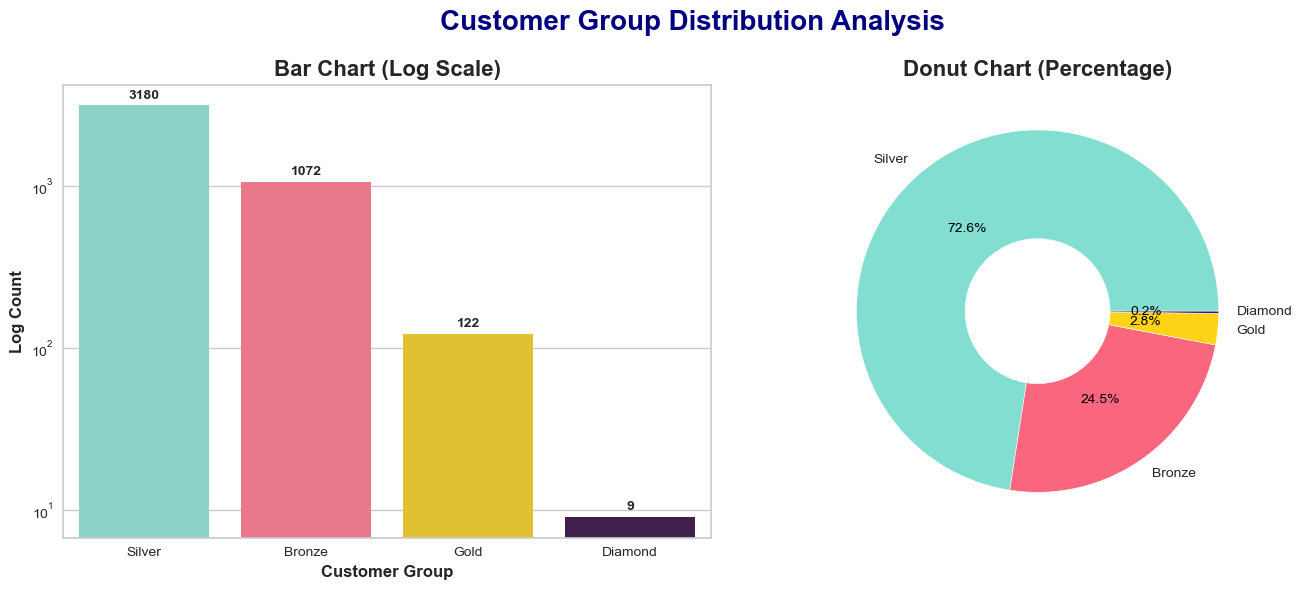

In [42]:
# import seaborn as sns
# import matplotlib.pyplot as plt

Group = result["Group"]
Count = result["count"]
Customcolors = ["#81DED0", "#FA667E", "#FED315", "#461856"]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Bar Chart
sns.barplot(x=Group, y=Count, hue=Group, palette=Customcolors, ax=ax1, legend=False)

ax1.set_yscale('log')  # Apply log scale
ax1.set_title("Bar Chart (Log Scale)", fontsize=16, fontweight='bold')
ax1.set_xlabel("Customer Group", fontsize=12, fontweight='bold')
ax1.set_ylabel("Log Count", fontsize=12, fontweight='bold')

for i, row in result.iterrows():
    ax1.text(
        x=i,
        y=row['count'] * 1.1,
        s=str(row['count']),
        ha='center',
        fontsize=10,
        fontweight='bold'
    )

# Donut (Pie) Chart
wedges, texts, autotexts = ax2.pie(
    Count,
    labels=Group,
    colors=Customcolors,
    autopct='%1.1f%%',
    startangle=0,
    wedgeprops=dict(width=0.6, edgecolor='white', linewidth=.4)
)
ax2.set_title("Donut Chart (Percentage)", fontsize=16, fontweight='bold')
plt.setp(autotexts, size=10, fontfamily='Arial', color="Black")

plt.suptitle("Customer Group Distribution Analysis", fontsize=20, fontweight='bold', color='navy')
plt.tight_layout()
plt.show()

In [43]:
ABC = RFM[RFM.Clusters==2]
ABC[ABC['Monetary']==ABC['Monetary'].min()]

,Recency,Frequency,Monetary,Clusters,Group
Customer ID,,,,,
17850.0,29,158,50414.5,2,Diamond


In [44]:
ABC[ABC['Monetary']==ABC['Monetary'].max()]

,Recency,Frequency,Monetary,Clusters,Group
Customer ID,,,,,
18102.0,22,95,341776.73,2,Diamond


In [45]:
diamond_customers = RFM[RFM["Group"] == "Diamond"]
diamond_customers

,Recency,Frequency,Monetary,Clusters,Group
Customer ID,,,,,
13089.0,25,132,55828.31,2,Diamond
13694.0,30,105,128172.42,2,Diamond
14156.0,28,138,183180.55,2,Diamond
14646.0,31,87,243853.05,2,Diamond
14911.0,22,270,137675.91,2,Diamond
15061.0,24,90,82162.74,2,Diamond
15311.0,22,158,54093.73,2,Diamond
17850.0,29,158,50414.50,2,Diamond
18102.0,22,95,341776.73,2,Diamond


In [46]:
scaler = MinMaxScaler()
normalized = scaler.fit_transform(diamond_customers[["Recency", "Frequency", "Monetary"]])
normalized

array([[0.33333333, 0.24590164, 0.01858103],
       [0.88888889, 0.09836066, 0.26687714],
       [0.66666667, 0.27868852, 0.45567351],
       [1.        , 0.        , 0.66391086],
       [0.        , 1.        , 0.29949458],
       [0.22222222, 0.01639344, 0.10896484],
       [0.        , 0.38797814, 0.01262768],
       [0.77777778, 0.38797814, 0.        ],
       [0.        , 0.04371585, 1.        ]])

In [47]:
diamond_normalized = pd.DataFrame(normalized, columns=["Recency_N", "Frequency_N", "Monetary_N"], index=diamond_customers.index)
diamond_normalized

,Recency_N,Frequency_N,Monetary_N
Customer ID,,,
13089.0,0.333333,0.245902,0.018581
13694.0,0.888889,0.098361,0.266877
14156.0,0.666667,0.278689,0.455674
14646.0,1.000000,0.000000,0.663911
14911.0,0.000000,1.000000,0.299495
15061.0,0.222222,0.016393,0.108965
15311.0,0.000000,0.387978,0.012628
17850.0,0.777778,0.387978,0.000000
18102.0,0.000000,0.043716,1.000000


In [48]:
diamond_customers = diamond_customers.copy()

In [49]:
diamond_customers["Score"] = (
    (1 - diamond_normalized["Recency_N"]) * 0.30 +  # Lower recency = better
    diamond_normalized["Frequency_N"] * 0.20 +
    diamond_normalized["Monetary_N"] * 0.50
)

In [50]:
diamond_customers["Diamond_Rank"] = diamond_customers["Score"].rank(ascending=False).astype(int)

In [51]:
diamond_customers_sorted = diamond_customers.sort_values("Diamond_Rank")
diamond_customers_sorted

,Recency,Frequency,Monetary,Clusters,Group,Score,Diamond_Rank
Customer ID,,,,,,,
18102.0,22,95,341776.73,2,Diamond,0.808743,1
14911.0,22,270,137675.91,2,Diamond,0.649747,2
15311.0,22,158,54093.73,2,Diamond,0.383909,3
14156.0,28,138,183180.55,2,Diamond,0.383574,4
14646.0,31,87,243853.05,2,Diamond,0.331955,5
15061.0,24,90,82162.74,2,Diamond,0.291094,6
13089.0,25,132,55828.31,2,Diamond,0.258471,7
13694.0,30,105,128172.42,2,Diamond,0.186444,8
17850.0,29,158,50414.50,2,Diamond,0.144262,9


In [52]:
diamond_customers_sorted[["Diamond_Rank", "Score", "Recency", "Frequency", "Monetary"]]

,Diamond_Rank,Score,Recency,Frequency,Monetary
Customer ID,,,,,
18102.0,1,0.808743,22,95,341776.73
14911.0,2,0.649747,22,270,137675.91
15311.0,3,0.383909,22,158,54093.73
14156.0,4,0.383574,28,138,183180.55
14646.0,5,0.331955,31,87,243853.05
15061.0,6,0.291094,24,90,82162.74
13089.0,7,0.258471,25,132,55828.31
13694.0,8,0.186444,30,105,128172.42
17850.0,9,0.144262,29,158,50414.50


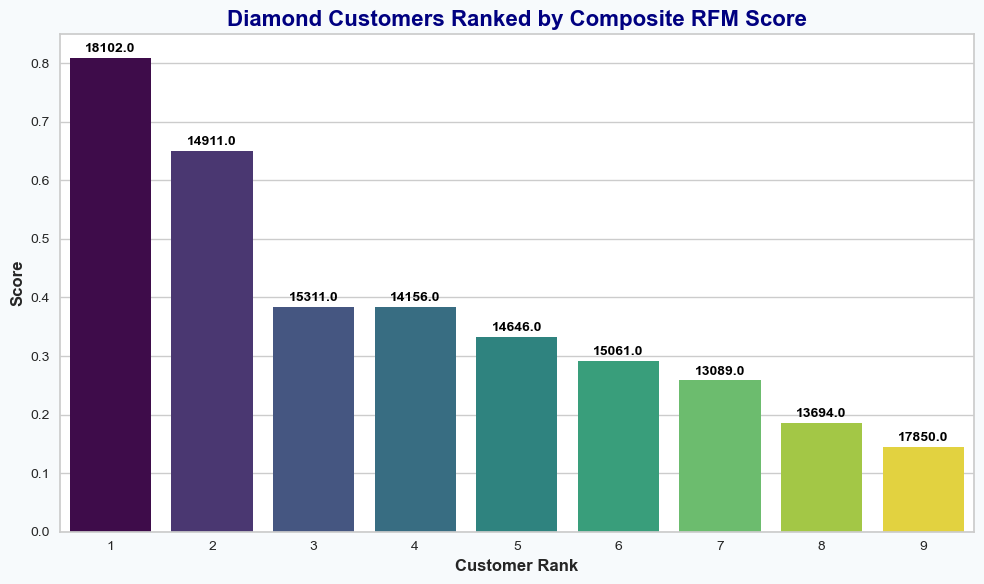

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the figure
plt.figure(figsize=(10, 6), facecolor="#F7FAFC")

Rank=diamond_customers_sorted["Diamond_Rank"]
Score=diamond_customers_sorted["Score"]
# Create barplot
barplot = sns.barplot(
    x=Rank,
    y=Score,
    hue=Rank,
    palette="viridis",
    legend=False
)

# Add Customer ID labels on top of bars
for index, row in diamond_customers_sorted.iterrows():
    barplot.text(
        x=row["Diamond_Rank"] - 1,  # Rank starts at 1; bar positions start at 0
        y=row["Score"] + 0.01,  # Position slightly above the bar
        s=str(index),
        ha='center',
        fontsize=10,
        fontweight='bold',
        color='black'
    )

# Styling
plt.title("Diamond Customers Ranked by Composite RFM Score", fontsize=16, fontweight='bold', color='navy')
plt.xlabel("Customer Rank", fontsize=12, fontweight='bold')
plt.ylabel("Score", fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()
